<a href="https://colab.research.google.com/github/NipunFernando/Machine-Learning/blob/main/E18100_Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports 

# For data analysis
import pandas as pd

# For model creation and performance evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# For visualizations and interactive dashboard creation
!pip install dash
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 43.9 MB/s eta 0:00:00


In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Load data set
data = pd.read_csv('/content/gdrive/MyDrive/SEM 06/CO544 - Machine Learning and Data Mining/LAB/Lab 3/winequality_red.csv') #Read the dataset
# Just for viewing
dataView = pd.read_csv('/content/gdrive/MyDrive/SEM 06/CO544 - Machine Learning and Data Mining/LAB/Lab 3/winequality_red.csv', sep=',') #Read the dataset
dataView.head() #Display first few rows


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Checking for missing values
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Re-checking for missing values
print(data.isnull().sum())




fixed acidity            0
volatile acidity        14
citric acid              0
residual sugar          12
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       5
sulphates                0
alcohol                  0
quality                  0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
# Checking for duplicate values (rows)
print(data.duplicated().sum())

# Drop duplicate rows
data = data.drop_duplicates(keep='first')

# Re-checking for duplicate values (rows)
print(data.duplicated().sum())

231
0


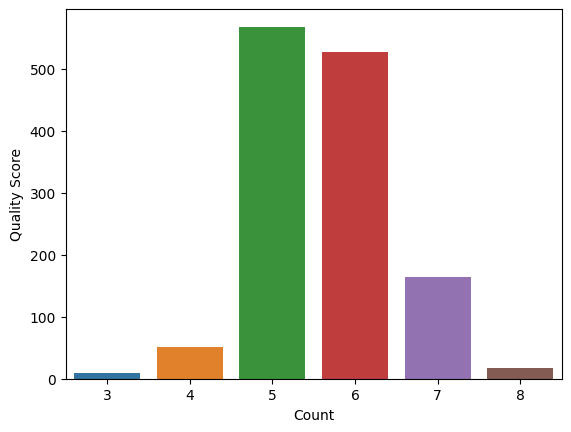

In [6]:
# Exploratory Data Analysis (EDA)

# Check wine quality distribution
plt.figure(dpi=100)
sns.countplot(data=data, x="quality")
plt.xlabel("Count")
plt.ylabel("Quality Score")
plt.show()


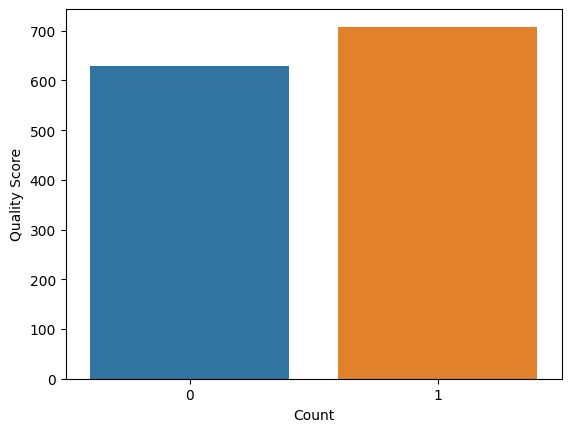

In [7]:
# Preparing the Dataset for Binary Classification


# Label quality into Good (1) and Bad (0)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6.0 else 0)

# Re-check wine quality distribution
plt.figure(dpi=100)
sns.countplot(data=data, x="quality")
plt.xlabel("Count")
plt.ylabel("Quality Score")
plt.show()


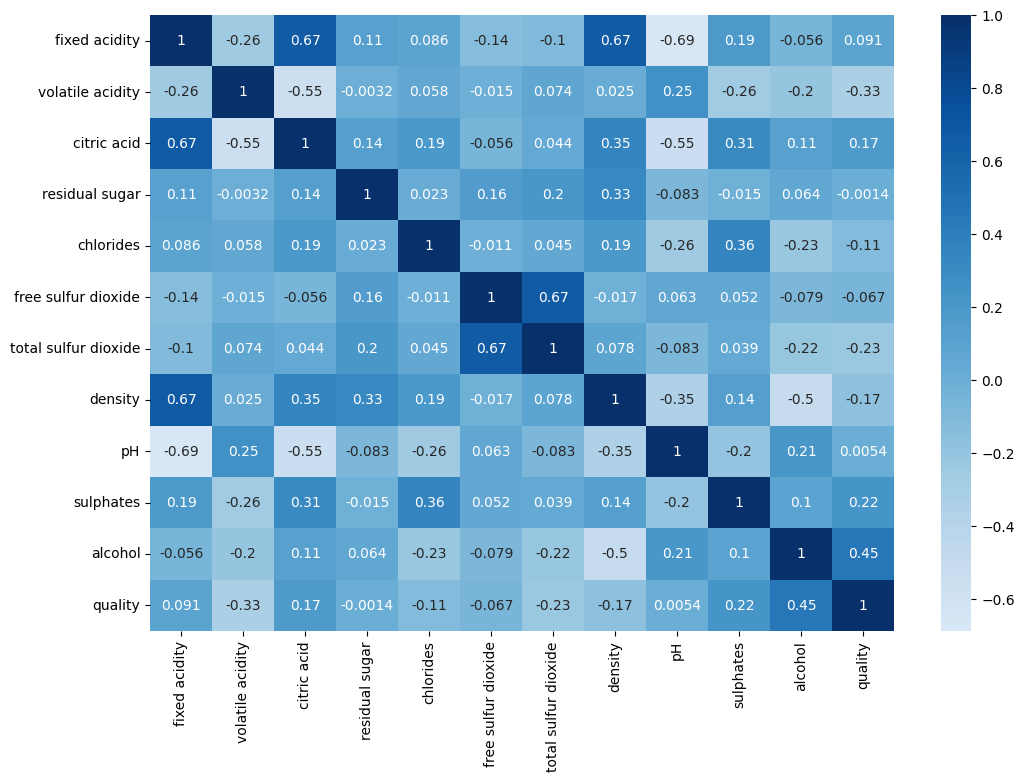

In [8]:
# Gaining Insights from the Correlation Matrix

# Calculate the correlation matrix
corr_matrix = data.corr()
# Plot heatmap
plt.figure(figsize=(12, 8), dpi=100)
sns.heatmap(corr_matrix, center=0, cmap='Blues', annot=True)
plt.show()


###How above figure can be used to gain insights into the features that most influence the wine quality and to identify highly correlated features.

•	Feature that most influence the wine quality :

> The correlation matrix provided in the above figure can be used the gain an insight about the features that most influence the wine quality by observing the correlation values in each cell corresponding to the row (or column) that states ‘quality’. ( The last row (or column) ).

 

> The features with values closer to +1 will directly influence the wine quality and features with values closer to -1 will inversely influence the wine quality, while features with values around 0 will have least influence on wine quality. 
<br><br>
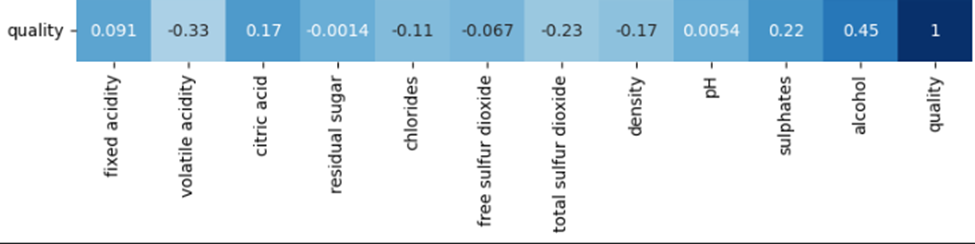
> But according to the results in above row, we cannot see any features mostly influencing the wine quality, where ‘Alcohol’ has a maximum direct influence correlation value of 0.45 and ‘volatile acidity’ has a maximum inverse influence of -0.33. ( Which are still very far from +1 and -1)




•	Highly correlated features :

> To understand highly correlated features, we need to observe the darkest ( cells with values closer to +1 ) and lightest ( cells with values closer to -1).
<br> <br>
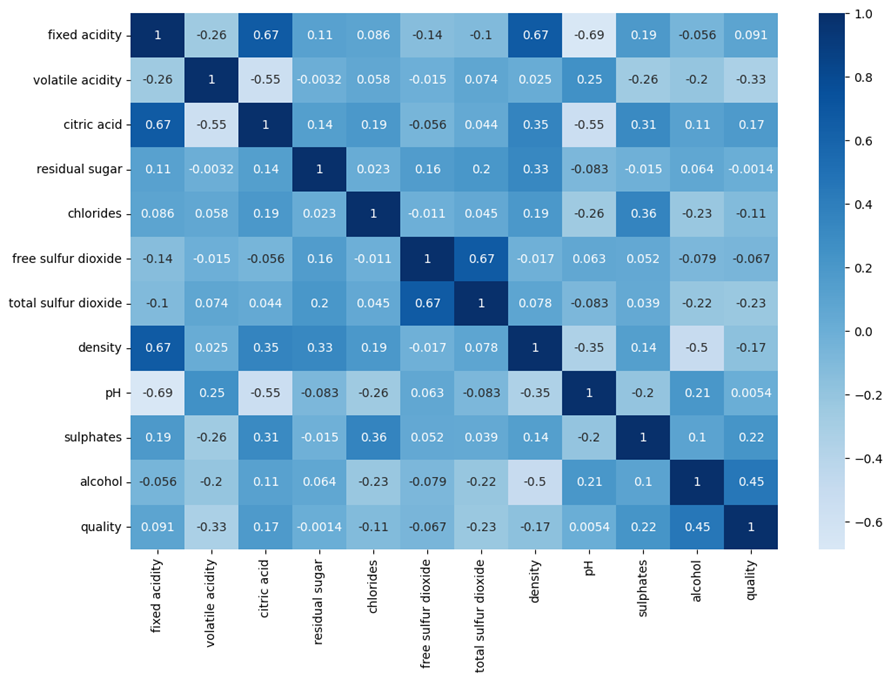
 

> From above graph we can identify;
>>Directly Correlated : 
		>>>Citric Acidity – Fixed Acidity<br>
		>>>Density – Fixed Acidity<br>
		>>>Free SO2 -  Total SO2 <br>

>>Inversely Correlated : 
		>>>pH – Fixed Acidity



In [9]:
# Drop the target variable
X = data.drop('quality', axis=1)  # Features
# Set the target variable as the label
y = data['quality']   # Targer variable


# Split the data into training and testing sets (20% testing and 80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [10]:
# Applying Logistic Regression

# Create an object of the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

#logreg = LogisticRegression(max_iter=1000)
# Fit the model to the training data
logreg_model.fit(X_train, y_train)


# Predict the labels of the test set
y_pred = logreg_model.predict(X_test)





In [11]:
print('Accuracy = ',100*sum(y_pred==y_test)/(sum(y_pred==y_test) + sum(y_pred!=y_test) + 0.0))


Accuracy =  77.23880597014926


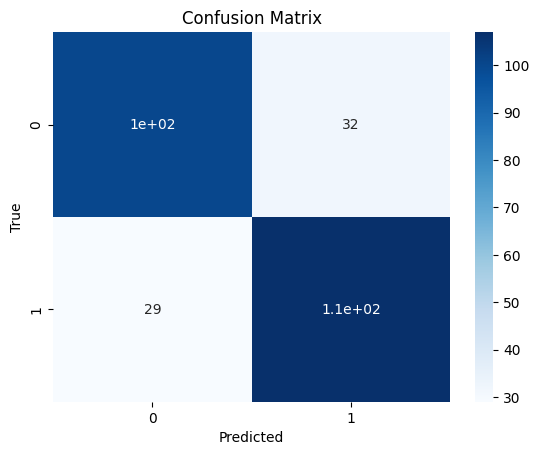

In [12]:
# Evaluating Model Performance

# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
labels = ['0', '1']
sns.heatmap(confusion_mat, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# show the plot
plt.show()

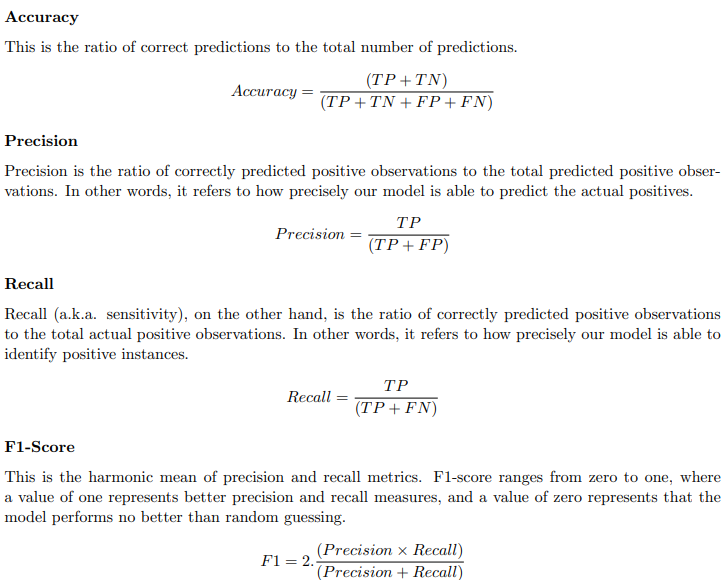



In [13]:
# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
# Compute the precision of the model
precision = precision_score(y_test, y_pred)
# Compute the recall of the model
recall = recall_score(y_test, y_pred)
# Compute the F1 score of the model
f1 = f1_score(y_test, y_pred)


print('Accuracy = ',accuracy)
print('Precision = ',precision)
print('Recall = ',recall)
print('F1 Score = ',f1)


Accuracy =  0.7723880597014925
Precision =  0.7697841726618705
Recall =  0.7867647058823529
F1 Score =  0.7781818181818181


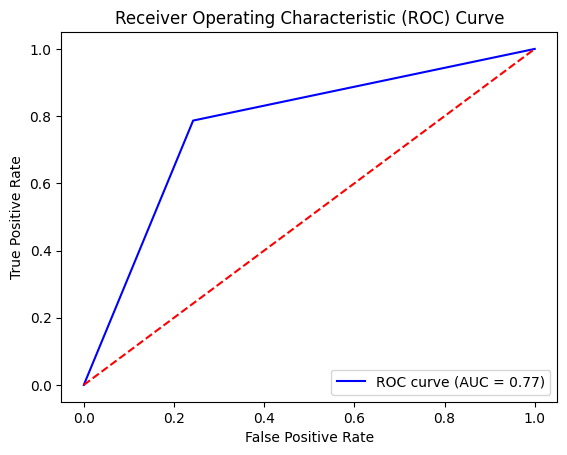

In [14]:
# The Receiver Operating Characteristic (ROC) Curve and the Area Under the Curve (AUC)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.figure(dpi=100)
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Performance Metrics ( Evaluating ML Model Performance )

Appropriate performance metrics differ from model to model based on the type of ML model such as Classification or Regression.
As this problem is based on classification of wine as good or bad, this model is a classification problem model (Binary Classification Model). Therefore;
*	Accuracy
*	Precision
*	Recall ( Sensitivity )
*	F1 Score
*	Receiver Operating  Characteristic (ROC) Curve
*	Area Under the Curve (AUC)
	<br>, can be used as suitable performance matrices for the given problem.<br>
From above matrices, F1 Score will include both Precision and Recall (Sensitivity). <br>
> F1 = 2.((P recision × Recall))/( (P recision + Recall)) 
<br>
Thus, F1 Score could be considered as the most appropriate metric for measuring model performance.



###Eliminating irrelevant features that may negatively affect the performance of the model and discuss how that may affect the model’s performance using above chosen metric.


In [15]:
# Load data set
data = pd.read_csv('/content/gdrive/MyDrive/SEM 06/CO544 - Machine Learning and Data Mining/LAB/Lab 3/winequality_red.csv') #Read the dataset

# Drop rows with missing values
data.dropna(inplace=True)

# Label quality into Good (1) and Bad (0)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6.0 else 0)

# Drop the target variable
X = data.drop('quality', axis=1)  # Features
# Dropping pH parameter tooooooooooooooooooooooooooooooooooooooooooooooooo........................
X = X.drop('pH', axis=1)  # Features
# Set the target variable as the label
y = data['quality']   # Targer variable

# Split the data into training and testing sets (20% testing and 80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Applying Logistic Regression

# Create an object of the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

#logreg = LogisticRegression(max_iter=1000)
# Fit the model to the training data
logreg_model.fit(X_train, y_train)


# Predict the labels of the test set
y_pred = logreg_model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
# Compute the precision of the model
precision = precision_score(y_test, y_pred)
# Compute the recall of the model
recall = recall_score(y_test, y_pred)
# Compute the F1 score of the model
f1 = f1_score(y_test, y_pred)


print('Accuracy = ',accuracy)
print('Precision = ',precision)
print('Recall = ',recall)
print('F1 Score = ',f1)

Accuracy =  0.7420382165605095
Precision =  0.7926829268292683
Recall =  0.7344632768361582
F1 Score =  0.7624633431085044


## Or
### Method 2 - Using sklearn


In [16]:
# Load data set
data = pd.read_csv('/content/gdrive/MyDrive/SEM 06/CO544 - Machine Learning and Data Mining/LAB/Lab 3/winequality_red.csv') #Read the dataset

# Drop rows with missing values
data.dropna(inplace=True)

# Label quality into Good (1) and Bad (0)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6.0 else 0)



# Dropping multiple features

from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 5 features using SelectKBest
kbest = SelectKBest(score_func=f_classif, k=5)
X_new = kbest.fit_transform(X, y)

# Print the selected features
print(X.columns[kbest.get_support()])

# Reassign the selected features to X
X = X[X.columns[kbest.get_support()]]

# Split the data into training and testing sets (20% testing and 80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Applying Logistic Regression

# Create an object of the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

#logreg = LogisticRegression(max_iter=1000)
# Fit the model to the training data
logreg_model.fit(X_train, y_train)


# Predict the labels of the test set
y_pred = logreg_model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
# Compute the precision of the model
precision = precision_score(y_test, y_pred)
# Compute the recall of the model
recall = recall_score(y_test, y_pred)
# Compute the F1 score of the model
f1 = f1_score(y_test, y_pred)


print('Accuracy = ',accuracy)
print('Precision = ',precision)
print('Recall = ',recall)
print('F1 Score = ',f1)

Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')
Accuracy =  0.7229299363057324
Precision =  0.774390243902439
Recall =  0.7175141242937854
F1 Score =  0.7448680351906158


### Trying different test/train split ratios and evaluate the model performance in terms of your chosen metric to find the optimal split ratio.


In [17]:
f1_max = 0
testSize = 0

for i in range(99):
  # Load data set
  data = pd.read_csv('/content/gdrive/MyDrive/SEM 06/CO544 - Machine Learning and Data Mining/LAB/Lab 3/winequality_red.csv') #Read the dataset

  # Drop rows with missing values
  data.dropna(inplace=True)

  # Label quality into Good (1) and Bad (0)
  data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6.0 else 0)


  # Split the data into training and testing sets (20% testing and 80% training)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i+1)/100, random_state=42)

  # Applying Logistic Regression

  # Create an object of the logistic regression model
  logreg_model = LogisticRegression(max_iter=1000)

  #logreg = LogisticRegression(max_iter=1000)
  # Fit the model to the training data
  logreg_model.fit(X_train, y_train)


  # Predict the labels of the test set
  y_pred = logreg_model.predict(X_test)

  # Compute the accuracy of the model
  accuracy = accuracy_score(y_test, y_pred)
  # Compute the precision of the model
  precision = precision_score(y_test, y_pred)
  # Compute the recall of the model
  recall = recall_score(y_test, y_pred)
  # Compute the F1 score of the model
  f1 = f1_score(y_test, y_pred)

  if f1 > f1_max:
    f1_max = f1
    testSize = (i+1)/100

  print(f1)

print('------')
print('Maximum F1 Score = ',f1_max)
print('Test Size =',testSize)

0.6153846153846154
0.7058823529411765
0.7450980392156864
0.7536231884057971
0.7272727272727273
0.7500000000000001
0.711864406779661
0.7022900763358779
0.7096774193548386
0.7142857142857143
0.7301587301587302
0.721951219512195
0.7181818181818183
0.7385892116182572
0.751937984496124
0.749090909090909
0.7465753424657534
0.7402597402597403
0.7453416149068323
0.7448680351906158
0.75
0.7547169811320756
0.7582697201017812
0.7591240875912408
0.7576470588235293
0.7595505617977527
0.7629310344827587
0.7631027253668764
0.7636363636363636
0.7613412228796844
0.763915547024952
0.764378478664193
0.7603603603603604
0.7600700525394045
0.7538726333907056
0.7563025210084033
0.7561374795417348
0.7500000000000001
0.7488299531981278
0.7503782148260212
0.7470588235294118
0.7471264367816092
0.7432624113475177
0.7423822714681441
0.7466307277628031
0.7371202113606341
0.7490347490347491
0.7544303797468355
0.753731343283582
0.7582017010935602
0.7615658362989323
0.7578947368421053
0.7580645161290324
0.761904761904

### Hyperparameter tuning for the logistic regression model using grid search to optimize the model’s performance with the dataset

Trying different hyperparameters, such as C (regularization
strength), penalty (regularization type), solver (optimization algorithm), and max iter (maximum
number of iterations to converge).

In [ ]:
# Imports
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters and their possible values to be tested in the grid search:

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000,2000,3000]
}

# Create an instance of the logistic regression model:

logreg_model = LogisticRegression()

# Create an instance of the GridSearchCV class and fit it with the training data:

grid_search = GridSearchCV(logreg_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters and the best score from the grid search:

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new logistic regression model using the best hyperparameters:
best_logreg_model = LogisticRegression(**best_params)
best_logreg_model.fit(X_train, y_train)

# Predict the labels of the test set using the new model:
y_pred_best = best_logreg_model.predict(X_test)

# Evaluate the performance of the new model:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Compare the results with the initial model:
print('Initial Model:')
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

print('\nBest Model (after hyperparameter tuning):')
print('Accuracy =', accuracy_best)
print('Precision =', precision_best)
print('Recall =', recall_best)
print('F1 Score =', f1_best)







